# Preprocessing .mat for NWB

In [1]:
import numpy as np
import h5py
import os
import yaml
import pandas as pd
from datetime import datetime
import shutil
import importlib
import numpy as np
import pandas as pd
import convert_to_nwb_for_AO
import scipy.io


# Load data 

## .mat files

In [2]:
WRAO039 = "data/mouse_anastasia/WR/AO039_20190626.mat"  
WRAO027 = "data/mouse_anastasia/WR/AO027_20181101.mat"
WnonRAO084 = "data/mouse_anastasia/WnonR/AO084_20210507.mat"
WnonRAO086 = "data/mouse_anastasia/WnonR/AO086_20210617.mat"

### Rewarded

In [15]:

with h5py.File(WRAO039, 'r') as f:
    data_group = f['Data']
    data_ref = f["#refs#"]
    #print("Références trouvées :")
    #for key in data_ref.keys():
    #    print(f" - {key} → shape: {data_ref[key].shape}, dtype: {data_ref[key].dtype}")
    print("Contenu de 'Data' :")
    for key in data_group.keys():
        print(f" - {key} → shape: {data_group[key].shape}, dtype: {data_group[key].dtype}")


Contenu de 'Data' :
 - ARAindex → shape: (75, 1), dtype: float64
 - Area → shape: (75, 1), dtype: object
 - BaselineFR_Mean → shape: (75, 1), dtype: float64
 - BaselineFR_Session → shape: (75, 1), dtype: object
 - CRIndices → shape: (1, 583), dtype: uint8
 - ClusterCounter → shape: (75, 1), dtype: float64
 - EngagedTrials → shape: (583, 1), dtype: uint8
 - FAIndices → shape: (1, 583), dtype: uint8
 - HitIndices → shape: (1, 583), dtype: uint8
 - ISI_Violation → shape: (75, 1), dtype: float64
 - ISO_Distance → shape: (75, 1), dtype: float64
 - JawOnsetsTms → shape: (583, 1), dtype: float64
 - JawTrace → shape: (583, 1000), dtype: float64
 - LFPs → shape: (3, 1), dtype: object
 - LickData → shape: (482142, 1), dtype: float64
 - LickTime → shape: (482142, 1), dtype: float64
 - LightIndices → shape: (1, 583), dtype: float64
 - MDS → shape: (1, 1), dtype: float64
 - ML_DV_AP → shape: (75, 1), dtype: object
 - ML_DV_AP_32 → shape: (75, 1), dtype: object
 - MissIndices → shape: (1, 583), dtyp

### Non-rewarded

In [16]:

with h5py.File(WnonRAO086, 'r') as f:
    data_group = f['Data']
    data_ref = f["#refs#"]
    #print("Références trouvées :")
    #for key in data_ref.keys():
    #    print(f" - {key} → shape: {data_ref[key].shape}, dtype: {data_ref[key].dtype}")
    print("Contenu de 'Data' :")
    for key in data_group.keys():
        print(f" - {key} → shape: {data_group[key].shape}, dtype: {data_group[key].dtype}")

Contenu de 'Data' :
 - ARAindex → shape: (135, 1), dtype: float64
 - Area → shape: (135, 1), dtype: object
 - BaselineFR_Mean → shape: (135, 1), dtype: float64
 - CRIndices → shape: (424, 1), dtype: float64
 - ClusterCounter → shape: (135, 1), dtype: float64
 - CoilAmps → shape: (367, 1), dtype: float64
 - CoilOnsets → shape: (367, 1), dtype: float64
 - ISI_Violation → shape: (135, 1), dtype: float64
 - ISO_Distance → shape: (135, 1), dtype: float64
 - JawOnsets_Tms → shape: (317, 1), dtype: float64
 - JawOnsets_Tms_All → shape: (434, 1), dtype: float64
 - JawOnsets_Tms_CompleteLicks → shape: (372, 1), dtype: float64
 - JawTrace → shape: (1, 902787), dtype: float64
 - LFPs → shape: (3, 1), dtype: object
 - MDS → shape: (1, 1), dtype: float64
 - ML_DV_AP → shape: (135, 1), dtype: object
 - ML_DV_AP_32 → shape: (135, 1), dtype: object
 - MissIndices → shape: (367, 1), dtype: uint8
 - NoseSideTrace → shape: (1, 902787), dtype: float64
 - NoseTopTrace → shape: (1, 902787), dtype: float64
 

### Comparison


In [7]:
with h5py.File(WRAO039, 'r') as f:
	data_group = f['Data'] if 'Data' in f else f
	WRAO039 = {key: data_group[key][()] for key in data_group.keys()}

with h5py.File(WRAO027, 'r') as f:
	data_group = f['Data'] if 'Data' in f else f
	WRAO027 = {key: data_group[key][()] for key in data_group.keys()}

with h5py.File(WnonRAO084, 'r') as f:
	data_group = f['Data'] if 'Data' in f else f
	WnonRAO084 = {key: data_group[key][()] for key in data_group.keys()}

with h5py.File(WnonRAO086, 'r') as f:
	data_group = f['Data'] if 'Data' in f else f
	WnonRAO086 = {key: data_group[key][()] for key in data_group.keys()}

In [8]:
# Comparaison WRAO039 et WRAO027
keys_WRAO039 = set(WRAO039.keys())
keys_WRAO027 = set(WRAO027.keys())

same_keys = keys_WRAO039 == keys_WRAO027
print("Les deux dictionnaires ont les mêmes clés :", same_keys)

if not same_keys:
    print("Clés uniquement dans WRAO039 :", keys_WRAO039 - keys_WRAO027)
    print("Clés uniquement dans WRAO027 :", keys_WRAO027 - keys_WRAO039)

Les deux dictionnaires ont les mêmes clés : True


In [9]:
# Comparaison WnonRAO084 et WnonRAO086
keys_WnonRAO084 = set(WnonRAO084.keys())
keys_WnonRAO086 = set(WnonRAO086.keys())

same_keys = keys_WnonRAO084 == keys_WnonRAO086
print("Les deux dictionnaires ont les mêmes clés :", same_keys)

if not same_keys:
    print("Clés uniquement dans WnonRAO084 :", keys_WnonRAO084 - keys_WnonRAO086)
    print("Clés uniquement dans WnonRAO086 :", keys_WnonRAO086 - keys_WnonRAO084)

Les deux dictionnaires ont les mêmes clés : True


In [11]:
# Comaraison WR et WnonR
keys_WR = set(WRAO039.keys())
keys_WnonR = set(WnonRAO084.keys())
same_keys = keys_WR == keys_WnonR
print("Les deux dictionnaires ont les mêmes clés :", same_keys)

if not same_keys:
    print("Clés uniquement dans WR :", keys_WR - keys_WnonR)
    print("Clés uniquement dans WnonR :", keys_WnonR - keys_WR)

    identical_keys = keys_WR & keys_WnonR
    print("Clés présentes dans les deux dictionnaires :", identical_keys)


Les deux dictionnaires ont les mêmes clés : False
Clés uniquement dans WR : {'SpontLicksVideo_TrialOn', 'QuietW_Times', 'Whisking_Indices', 'SpontLicksPiezo_FakeTrialOn', 'StimIndices', 'LickData', 'SpontLicksVideo_FakeTrialOn', 'BaselineFR_Session', 'ReactionTimes', 'LickTime', 'HitIndices', 'Whisking_Times', 'SpontLicksPiezo_LickOn', 'Whisking_Indices_NoLick', 'Whisking_Times_NoLick', 'FAIndices', 'VideoOnsets', 'SpontLicksVideo_JawOn', 'EngagedTrials', 'LightIndices', 'threshold_amp', 'JawOnsetsTms'}
Clés uniquement dans WnonR : {'JawOnsets_Tms', 'JawOnsets_Tms_All', 'Whisking_Tms', 'ValveOnsets_Tms', 'RewardedLicks_Ind_MouseTriggered', 'JawOnsets_Tms_CompleteLicks', 'PiezoLickOnset_Tms', 'depth', 'RewardedLicks_Ind_Assosiation', 'Quiet_Tms', 'CoilAmps', 'Valve_Ind_Assosiation', 'VideoFrames_Tms', 'PiezoLickOnset_Tms_CompleteLicks', 'Whisking_Tms_NoLick', 'CoilOnsets', 'RewardedLicks_Ind_All', 'Quiet_Tms_NoLick', 'Valve_Ind_MouseTriggered'}
Clés présentes dans les deux dictionnaires

## Try anything .mat

In [ ]:
WRAO039 = "data/mouse_anastasia/WR/AO039_20190626.mat"  
WRAO027 = "data/mouse_anastasia/WR/AO027_20181101.mat"
WnonRAO084 = "data/mouse_anastasia/WnonR/AO084_20210507.mat"
WnonRAO086 = "data/mouse_anastasia/WnonR/AO086_20210617.mat"

with h5py.File(WRAO027, 'r') as f:
	data_group = f['Data'] if 'Data' in f else f
	data = {key: data_group[key][()] for key in data_group.keys()}
	
	

In [20]:
with h5py.File(WRAO027, 'r') as f:
    data_group = f['Data'] if 'Data' in f else f
    data = {key: data_group[key][()] for key in data_group.keys()}
    
print(data["Area"].shape)
print(data["Area"])


(78, 1)
[[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object refer

In [ ]:
with h5py.File(WRAO027, 'r') as f:
    data_group = f['Data'] if 'Data' in f else f
    lfp_refs = data_group['LFPs'][()]  # shape (3,1)
    
    # Accès aux vrais tableaux
    lfp_data = [f[ref[0]][()] for ref in lfp_refs]
    
    for i, lfp in enumerate(lfp_data):
        print(f"LFP {i} shape:", lfp.shape)



LFP 0 shape: (10784095, 32)
LFP 1 shape: (10784095, 32)
LFP 2 shape: (2,)


# CSV file


In [ ]:

csv_data = pd.read_csv("data/Subject_Session_Selection.csv", sep=";")
csv_data.columns = csv_data.columns.str.strip() 
csv_data.columns

In [ ]:

mouse = ''.join(chr(c) for c in WnonRAO084['mouse'].flatten())
date = ''.join(chr(c) for c in WnonRAO084['date'].flatten())
session_name = f"{mouse}_{date}"  

try:
    subject_info = csv_data[csv_data['Session'].astype(str).str.strip() == session_name].iloc[0]
except IndexError:
    raise ValueError(f"Session {session_name} not found in the CSV file.")


 # TOTAL _-_-_-_-_-_-_-_
 

**************************************************************************
-_-_-_-_-_-_-_-_-_-_-_-_-_-_- NWB conversion _-_-_-_-_-_-_-_-_-_-_-_-_-_-_
 
📃 Creating config file for NWB conversion :
📑 Created NWB file :
ephys Whisker Rewarded: Acute extracellular recordings using NeuroNexus single-shank 32-channel probes. Bandpass filtered (0.3 Hz – 7.5 kHz), amplified and digitized at 30 kHz (CerePlex M32, Blackrock). Data recorded via CerePlex Direct system.
     o 📌 Add general metadata
         - Subject metadata
         - Session metadata
         - Device metadata
         - Extracellular electrophysiology metadata
     o 📶 Add acquisition container
     o ⏸️ Add intervall container
     o 🧠 Add units container
     o ⚙️ Add processing container
         - Behavior data
         - No ephys data for AN sessions
         - Analysis complementary information
             > Added PSTH_mean_across_all_units to analysis module
             > Added LFP_mean_across_all_units to analysis mo

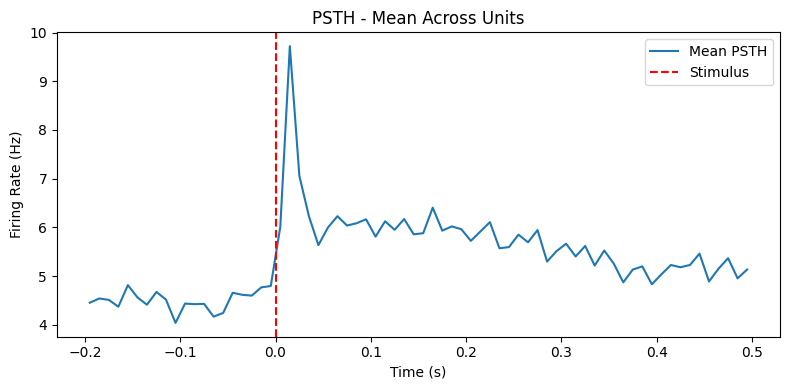

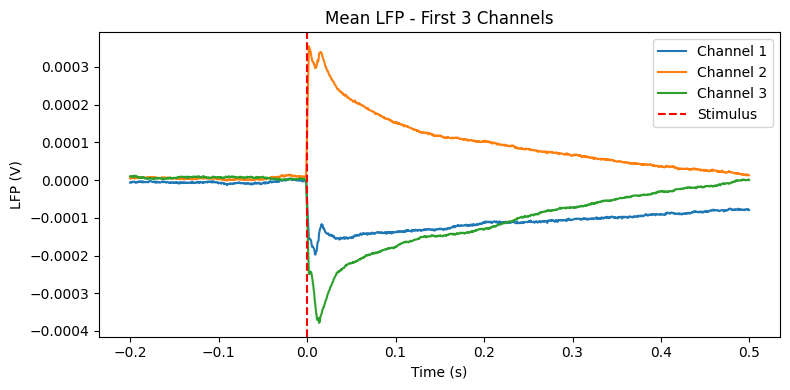

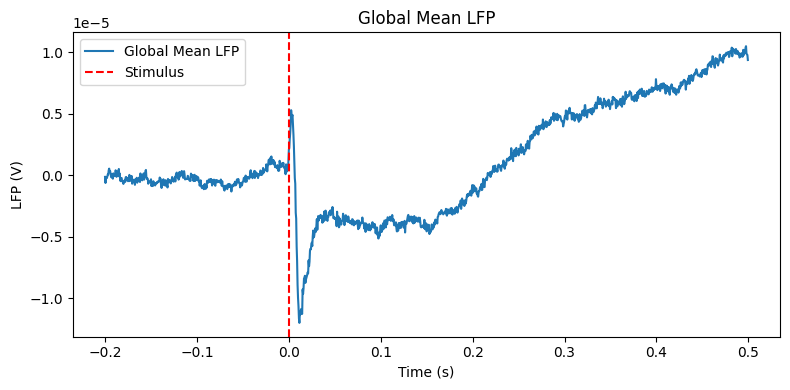

In [3]:

filename = "/Users/lorisfabbro/Desktop/Divers/LSENS/NWB_converter_AN/NWB_converter_AN/data/mouse_anastasia/WR/AO027_20181101.mat" # Chemin vers le fichier .mat
importlib.reload(convert_to_nwb_for_AO)
nwb_path = convert_to_nwb_for_AO.convert_data_to_nwb_an(mat_file=filename, output_folder="data")

# Accessibilité 

In [11]:
import h5py
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np

# Ouvre le fichier NWB
nwb_file = "data/AO084_20210507_174652.nwb"
io = NWBHDF5IO(nwb_file, mode='r')
nwb = io.read()
stim_times = nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series["StimFlags"].timestamps[:]
stim_data = nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series["StimFlags"].data[:]


In [14]:
print(stim_times.shape)
print(stim_data.shape)


(499,)
(499,)


array([3., 1., 2., 2., 2., 2., 3., 1., 4., 1., 3., 4., 1., 1., 2., 4., 3.,
       2., 3., 4., 3., 3., 4., 1., 1., 2., 2., 4., 3., 1., 4., 2., 3., 4.,
       1., 2., 3., 1., 2., 4., 2., 4., 1., 3., 2., 3., 1., 4., 1., 2., 4.,
       3., 2., 4., 3., 2., 4., 1., 1., 3., 1., 4., 3., 1., 2., 4., 3., 2.,
       3., 2., 2., 4., 1., 4., 1., 3., 2., 4., 1., 1., 4., 3., 3., 2., 4.,
       2., 4., 3., 1., 1., 3., 2., 4., 3., 2., 1., 4., 2., 3., 1., 3., 1.,
       2., 3., 1., 4., 4., 2., 3., 2., 1., 3., 4., 1., 4., 2., 4., 3., 4.,
       1., 1., 2., 3., 2., 1., 2., 2., 3., 3., 4., 1., 2., 2., 1., 4., 2.,
       1., 4., 3., 4., 2., 3., 1., 4., 2., 1., 4., 3., 2., 3., 1., 3., 4.,
       2., 1., 3., 1., 4., 2., 4., 2., 3., 3., 1., 1., 2., 4., 1., 1., 2.,
       4., 3., 4., 2., 3., 2., 1., 4., 2., 1., 3., 4., 3., 2., 3., 2., 3.,
       1., 1., 4., 4., 1., 2., 3., 3., 4., 1., 2., 4., 1., 4., 4., 1., 2.,
       2., 3., 3., 3., 1., 3., 4., 2., 1., 4., 2., 3., 2., 2., 1., 3., 4.,
       1., 4., 1., 3., 3.

In [ ]:
behavior_events = nwb.processing['behavior'].data_interfaces['BehavioralEvents']
print("Contenu de BehavioralEvents :", list(behavior_events.fields.keys()))

In [ ]:
# Accède au conteneur interne
event_series = nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series

# Affiche les noms des TimeSeries comportementales
print("Séries dans BehavioralEvents :", list(event_series.keys()))

In [ ]:
nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series["TrialOnsets"].timestamps[:]  # Accède aux timestamps des événements "TrialOnsets"
print(nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series["StimFlags"].data[:])

In [6]:
stim_times = nwb.processing['behavior'].data_interfaces['BehavioralEvents'].time_series["StimFlags"].timestamps[:]

AttributeError: 'str' object has no attribute 'processing'

In [7]:
nwb_file

'data/AO084_20210507_174652.nwb'

# Autres